# NB. Burgers equation

In this notebook, we time-integrate the Burgers equation using a Fourier-Galerkin method.  In space we use a Fourier method, and in time a simple explicit Euler forward method.

In [2]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (14,5),
          'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)
#%matplotlib notebook
%matplotlib inline

## Setup and initial condition

We assume a periodic domain of length of $L=2\pi$ so the fundamental wavenumber is $\alpha=2\pi / L = 1$ and thus not included. We want to time-integrate the Burgers equation 

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} =0 \ ,$$

starting from an initial condition $u_0$ up to time $T$.

In physical space we have $N$ grid points for a periodic domain

In [3]:
N=100
x=np.linspace(0,2*pi,N,endpoint=False)

A simple sine wave is used as initial condition $u_0=\sin(x)$ at time $t=0$

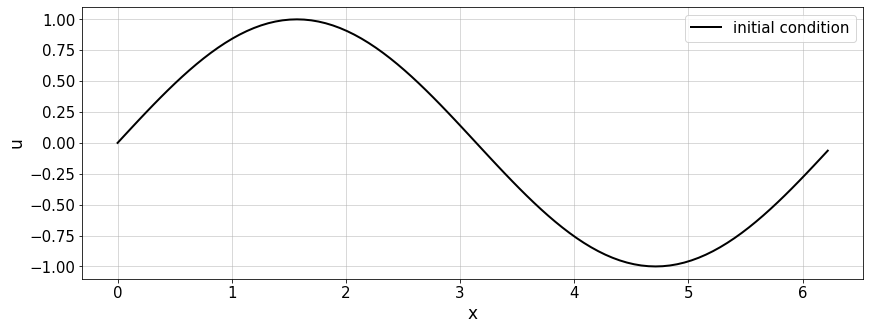

In [4]:
u0 = np.sin(x)
plt.figure(figsize=(14,5))
plt.xlabel('x');plt.ylabel('u')
plt.plot(x,u0,'-k',lw=2,label='initial condition')
plt.legend(loc='best')
plt.grid()

We transfrom this initial condition into Fourier space, using the Fourier matrix introduced earlier (could be done using an FFT as well of course, then scale with $N$). We copy the data around to match the data format.

In [5]:
def FourMat(n):
    """ Fourier Matrix """    
    W=np.exp(-1j*2*pi/n)
    I,J=np.meshgrid(np.arange(n),np.arange(n))
    return (W**(I*J))
F=FourMat(N)/N
Finv=np.linalg.inv(F)

# you can use the DFT
# u0hh=F@u0
# or the FFT
u0hh=np.fft.fft(u0)/N

Here we have to be a bit careful. We need to keep in mind that the *oddball mode* in Fourier space needs to be set to zero. This means that $N$ points in physical space correspond to wavenumbers from $k=-K\ldots K$ with $K=N/2-1$, and the mode $k=-N/2$ has to be set to zero.

In [6]:
K=int(N/2)-1
u0hh[K+1]=0
u0h=np.fft.fftshift(u0hh) 

## Fourier-Galerkin spectral method

Now we can do a time integration of

$$
\frac{\mathrm{d}\hat{u}_l}{\mathrm{d}t} + \sum_{\substack{k=-K\\ l=k+m\\ |m|\leq K}}^K \mathrm{i} m \hat{u}_k\hat{u}_m = 0 \ ,
$$

where $l$ goes from $-K$ to $K$, using an explicit Euler method. We choose a time step $\Delta t=0.01$ and a final time $T=1$



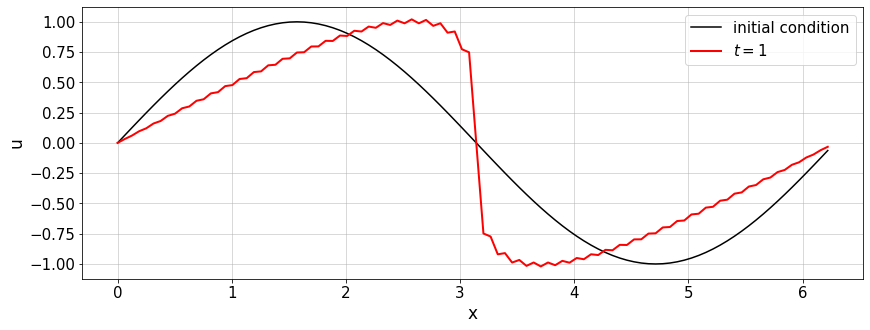

In [9]:
dt=0.01
nt=101
t=np.arange(nt)

kk=range(-K,K+1)

uh=u0h

for t_ in t:
    time=t_*dt
    f=0*uh
    for l_ in kk:
        
        for k_ in kk:
            m_=l_-k_
            if abs(m_)<=K:
                f[l_+int(N/2)] += 1j*m_*uh[k_+int(N/2)]*uh[m_+int(N/2)]
        
    uh = uh-dt*f
    
uhh=np.fft.ifftshift(uh)

# you can use the DFT
#u1=Finv@uhh  
# or the FFT
u1=np.fft.ifft(uhh*N)

    
plt.figure(figsize=(14,5))
plt.xlabel('x');plt.ylabel('u')
plt.plot(x,u0,'-k',label='initial condition')
plt.plot(x,u1.real,'-r',lw=2,label='$t=1$')
plt.legend(loc='best')
plt.grid()

    


We integrate now up to $t=1$, which means that the peak should have travelled by one unit. One can see that there are some wiggles appearing, which is due to the nonlinearity and the missing dissipation.

In fact, repeating the same calculation with a smaller time step $\Delta t=0.001$ does not change anything on the wiggles:

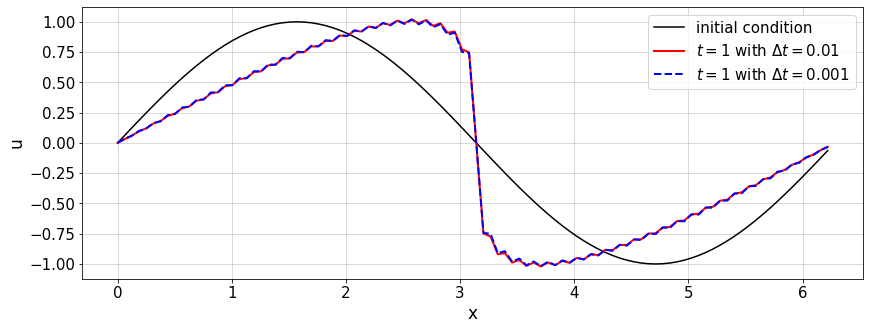

In [76]:
dt=0.001
nt=1001
t=np.arange(nt)

kk=range(-K,K+1)

uh=u0h

for t_ in t:
    time=t_*dt
    f=0*uh
    for l_ in kk:
        
        for k_ in kk:
            m_=l_-k_
            if abs(m_)<=K:
                f[l_+int(N/2)] += 1j*m_*uh[k_+int(N/2)]*uh[m_+int(N/2)]
        
    uh = uh-dt*f
    
uhh=np.fft.ifftshift(uh)

# you can use the DFT
#u1=Finv@uhh  
# or the FFT
u2=np.fft.ifft(uhh*N)
 
    
plt.figure(figsize=(14,5))
plt.xlabel('x');plt.ylabel('u')
plt.plot(x,u0,'-k',label='initial condition')
plt.plot(x,u1.real,'-r',lw=2,label='$t=1$ with $\Delta t=0.01$')
plt.plot(x,u2.real,'--b',lw=2,label='$t=1$ with $\Delta t=0.001$')
plt.legend(loc='best')
plt.grid()


## Homework task

Your task is now to extend this example with a pseudo-spectral evaluation of the nonlinear term 

$$\sum_{\substack{k=-K\\ l=k+m\\ |m|\leq K}}^K \mathrm{i} m \hat{u}_k\hat{u}_m$$

1. Replace this convolution sum with an evaluation using FFTs. Remember to use ``fftshift`` to re-organise the array before and after the transforms. Run the code for shorter time $T=0.1$ and longer time $T=1$. What do you observe?
2. Try to address the problem of aliasing errors by using the $2/3$-rule, *i.e.* by filtering in Fourier space before/after the transforms. Do the results change for shorter and longer times, respectively?
3. [voluntary] Try to implement the $3/2$ rule, $i.e.$ extend the arrays before the transform and reduce after the back-transform. Do you see any differences to the $2/3$-rule?

Prepare and hand in a short report discussing your results together with the codes.
